# Bigmart Outlet Sales Prediction for 
Technocolabs internship


## 1. Problem Statement 

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.



## 2. Hypothesis Generation


### Variable Description
###### Item_Identifier ----> Unique product ID
###### Item_Weight ----> Weight of product
###### Item_Fat_Content ----> Whether the product is low fat or not
###### Item_Visibility ----> The % of the total display area of all products in a store allocated to the particular product
###### Item_Type ----> The category to which the product belongs
###### Item_MRP ----> Maximum Retail Price (list price) of the product
###### Outlet_Identifier ----> Unique store ID
###### Outlet_Establishment_Year ----> The year in which the store was established
###### Outlet_Size ----> The size of the store in terms of ground area covered
###### Outlet_Location_Type ----> The type of city in which the store is located
###### Outlet_Type ----> Whether the outlet is just a grocery store or some sort of supermarket
###### Item_Outlet_Sales ----> sales of the product in t particular store. This is the outcome variable to be predicted.



# 3. Loading Packages and Data

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge , Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor


In [2]:
data = pd.read_csv(r'Train.csv')

In [3]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# Data Preprocessing 

In [4]:
def data_info (data):
    column = []
    dtype = []
    nunique = []
    unique = []
    nulls = []
    
    for col in data.columns:
        column.append(col)
        dtype.append(data[col].dtype)
        nunique.append(data[col].nunique())
        unique.append(data[col].unique())
        nulls.append(data[col].isna().sum())

    data_info = {'Column' : column , 'Data Type' :dtype ,'nunique':nunique, 'unique':unique 
                , 'Nulls' : nulls }
    data = pd.DataFrame(data_info)
    return data

In [5]:
data_info(data)

,Column,Data Type,nunique,unique,Nulls
0,Item_Identifier,object,1559,"[FDA15, DRC01, FDN15, FDX07, NCD19, FDP36, FDO...",0
1,Item_Weight,float64,415,"[9.3, 5.92, 17.5, 19.2, 8.93, 10.395, 13.65, n...",1463
2,Item_Fat_Content,object,5,"[Low Fat, Regular, low fat, LF, reg]",0
3,Item_Visibility,float64,7880,"[0.016047301, 0.019278216, 0.016760075, 0.0, 0...",0
4,Item_Type,object,16,"[Dairy, Soft Drinks, Meat, Fruits and Vegetabl...",0
5,Item_MRP,float64,5938,"[249.8092, 48.2692, 141.618, 182.095, 53.8614,...",0
6,Outlet_Identifier,object,10,"[OUT049, OUT018, OUT010, OUT013, OUT027, OUT04...",0
7,Outlet_Establishment_Year,int64,9,"[1999, 2009, 1998, 1987, 1985, 2002, 2007, 199...",0
8,Outlet_Size,object,3,"[Medium, nan, High, Small]",2410
9,Outlet_Location_Type,object,3,"[Tier 1, Tier 3, Tier 2]",0


In [6]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
data.duplicated().sum()

0

we don't have duplicated in our DataSet


### Solving null values in outlet_size

In [8]:
data.groupby(['Outlet_Identifier'])['Outlet_Size'].count()


Outlet_Identifier
OUT010      0
OUT013    932
OUT017      0
OUT018    928
OUT019    528
OUT027    935
OUT035    930
OUT045      0
OUT046    930
OUT049    930
Name: Outlet_Size, dtype: int64

we have 3 outlet doesn't have a size so we will try to find a relationship between that column and other column to fill that missing values

In [9]:
outlet = ['OUT010' ,'OUT013' , 'OUT017' , 'OUT018' , 'OUT019' , 'OUT027' ,'OUT035' ,'OUT045','OUT046', 'OUT049']
location = []
for i in outlet :
    loc = data.groupby(['Outlet_Identifier'])['Outlet_Location_Type'].get_group(i)
    z = loc.value_counts().index[0]
    location.append(z)
location_1 = {'Outlet_Location_Type' : location}
size = pd.DataFrame( location_1 , index=outlet )
size

,Outlet_Location_Type
OUT010,Tier 3
OUT013,Tier 3
OUT017,Tier 2
OUT018,Tier 3
OUT019,Tier 1
OUT027,Tier 3
OUT035,Tier 2
OUT045,Tier 2
OUT046,Tier 1
OUT049,Tier 1


In [10]:
size = []
for i in location :
    loc = data.groupby(['Outlet_Location_Type'])['Outlet_Size'].get_group(i)
    z = loc.value_counts().index[0]
    size.append(z)
size_1 = {'Outlet_Size' : size}
size = pd.DataFrame( size_1 , index=location )
size

,Outlet_Size
Tier 3,Medium
Tier 3,Medium
Tier 2,Small
Tier 3,Medium
Tier 1,Small
Tier 3,Medium
Tier 2,Small
Tier 2,Small
Tier 1,Small
Tier 1,Small


So we have missing values on [OUT010 , OUT017 , OUT045 ] we will fill everyone of that by it's location size 

In [11]:
data['Outlet_Size'][data['Outlet_Location_Type'] == 'Tier 3'].isna().sum()

555

In [12]:
data['Outlet_Size'][data['Outlet_Location_Type'] == 'Tier 3']=data['Outlet_Size'][data['Outlet_Location_Type'] == 'Tier 3'].fillna('Medium')
data['Outlet_Size'][data['Outlet_Location_Type'] == 'Tier 2']=data['Outlet_Size'][data['Outlet_Location_Type'] == 'Tier 2'].fillna('Small')



In [13]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Solving null values in Item_Weight

In [14]:
for i in data['Item_Identifier']:
    print(data.groupby(['Item_Identifier'])['Item_Weight'].get_group(i))

0       9.3
831     9.3
2599    9.3
2643    9.3
4874    9.3
5413    9.3
6696    NaN
7543    9.3
Name: Item_Weight, dtype: float64
1       5.92
2272    5.92
2927     NaN
5029    5.92
5077    5.92
5218    5.92
Name: Item_Weight, dtype: float64
2       17.5
759     17.5
4817    17.5
5074    17.5
6163    17.5
6952     NaN
8349     NaN
Name: Item_Weight, dtype: float64
3       19.2
1491    19.2
2459    19.2
3089    19.2
5906    19.2
7735     NaN
Name: Item_Weight, dtype: float64
4       8.93
522     8.93
802     8.93
2129    8.93
2907    8.93
3428    8.93
Name: Item_Weight, dtype: float64
5       10.395
1912    10.395
5685    10.395
Name: Item_Weight, dtype: float64
6       13.65
781     13.65
945     13.65
1576    13.65
4552      NaN
6802    13.65
8164      NaN
8197    13.65
Name: Item_Weight, dtype: float64
7        NaN
585     19.0
2623    19.0
3382    19.0
4585    19.0
6087    19.0
7883    19.0
Name: Item_Weight, dtype: float64
8       16.2
1920    16.2
2718     NaN
5276    16.2
6220   

we found every item has one of this weight is nan so we will fill every weight of item with it's weight 

In [15]:
data_1 = data.sort_values('Item_Identifier')

In [16]:
data_1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8043,DRA12,11.60,Low Fat,0.068535,Soft Drinks,143.0154,OUT010,1998,Medium,Tier 3,Grocery Store,283.6308
118,DRA12,11.60,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,Small,Tier 2,Supermarket Type1,2552.6772
1693,DRA12,11.60,LF,0.000000,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078
1197,DRA12,11.60,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,2002,Small,Tier 2,Supermarket Type1,3829.0158
1245,DRA12,11.60,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,2552.6772
...,...,...,...,...,...,...,...,...,...,...,...,...
7926,NCZ54,14.65,Low Fat,0.083489,Household,161.3552,OUT049,1999,Medium,Tier 1,Supermarket Type1,7148.0288
214,NCZ54,14.65,Low Fat,0.000000,Household,161.5552,OUT010,1998,Medium,Tier 3,Grocery Store,324.9104
1896,NCZ54,NaN,Low Fat,0.082956,Household,164.0552,OUT027,1985,Medium,Tier 3,Supermarket Type3,5523.4768
7166,NCZ54,NaN,Low Fat,0.145952,Household,160.9552,OUT019,1985,Small,Tier 1,Grocery Store,162.4552


In [17]:
data_1.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [18]:
data_1.fillna(method='bfill' , inplace=True)

In [19]:
data_1.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

we fill every nan by item_identifier of same weight 

## Check Outliers

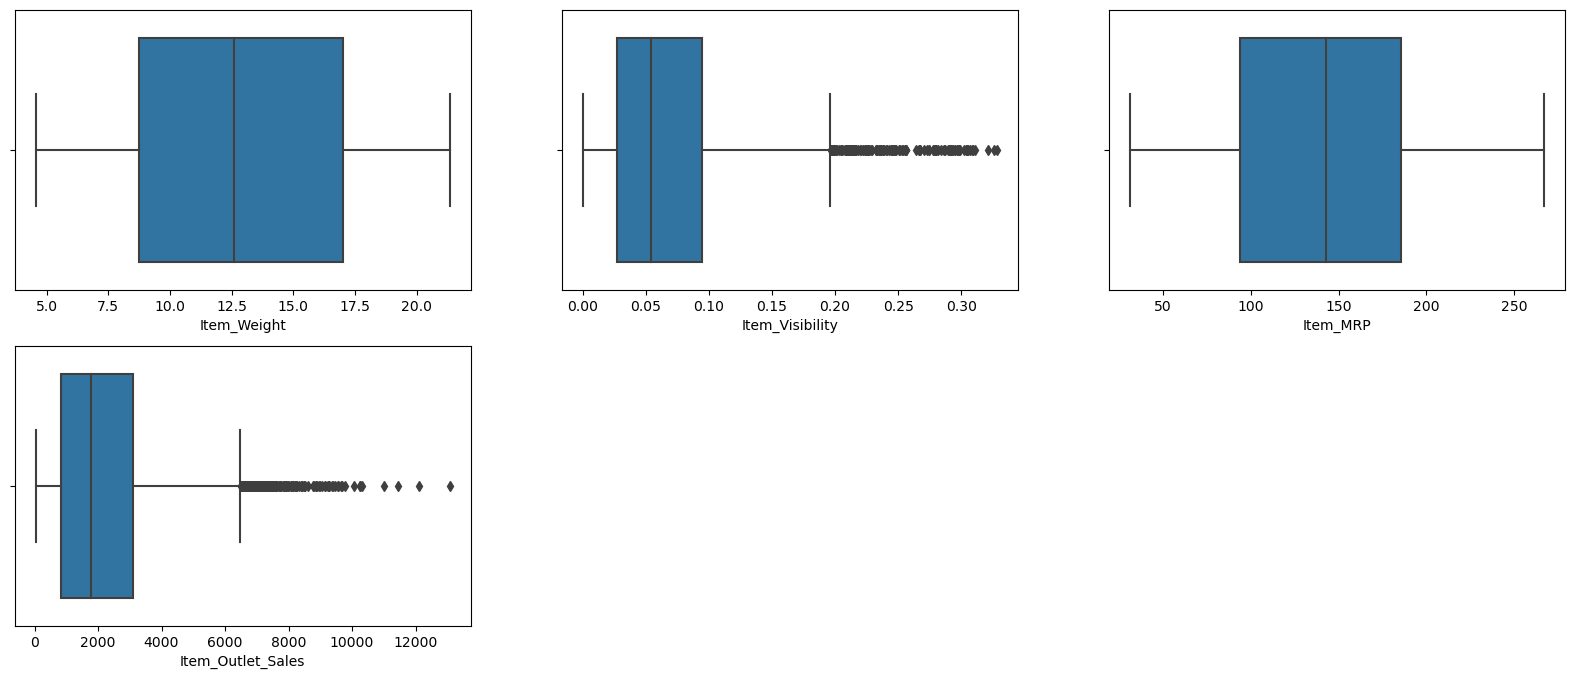

In [20]:
plt.figure(figsize = (20,8))
plt.subplot(2,3,1)
sns.boxplot(data_1['Item_Weight'])
plt.subplot(2,3,2)
sns.boxplot(data_1['Item_Visibility'])
plt.subplot(2,3,3)
sns.boxplot(data_1['Item_MRP'])
plt.subplot(2,3,4)
sns.boxplot(data_1['Item_Outlet_Sales']);


we have outliers in two columns [Item_Visibility , Item_Outlet_Sales] so we want to check distribution of that columns 

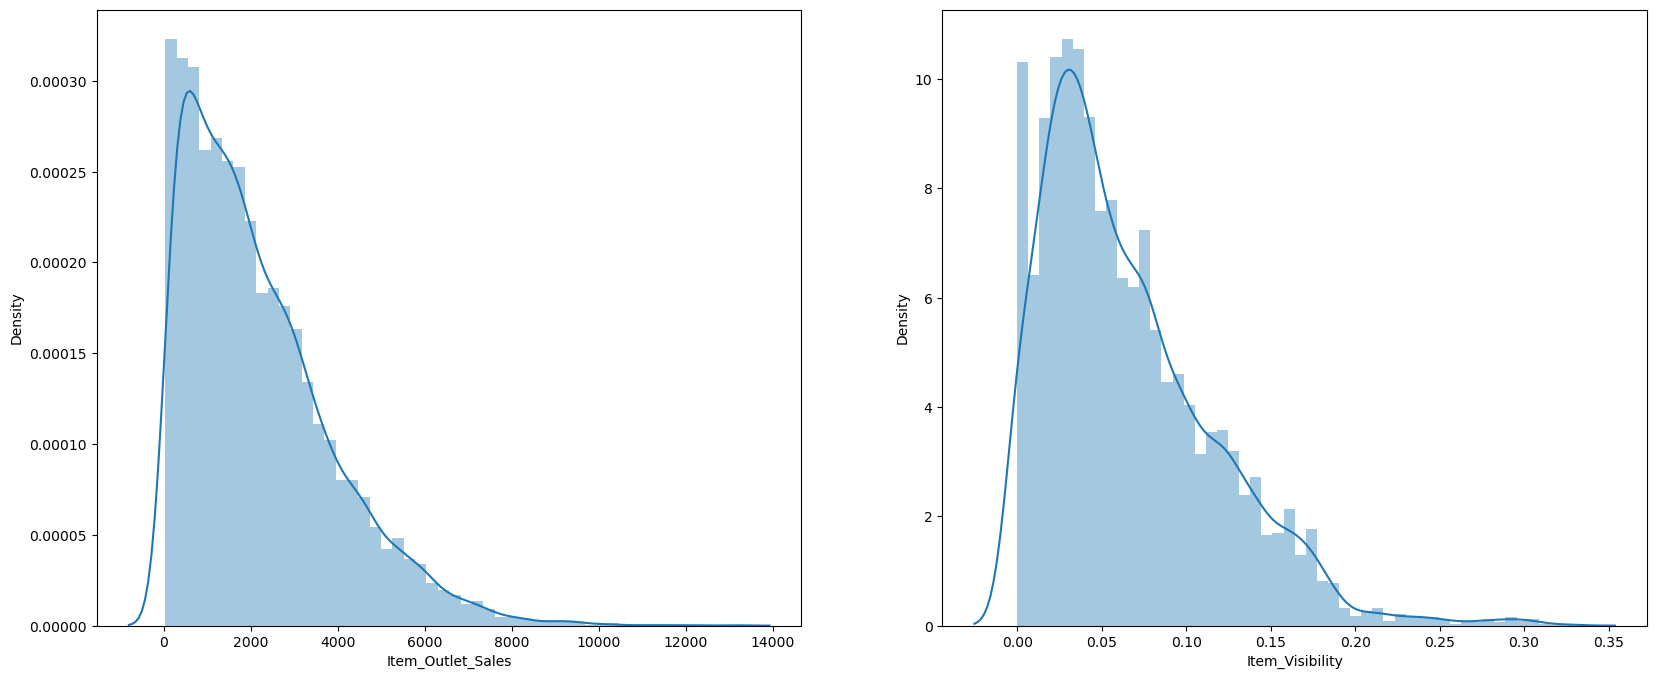

In [21]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.distplot(data_1['Item_Outlet_Sales'])
plt.subplot(1,2,2)
sns.distplot(data_1['Item_Visibility']);

both are Right skewed distribution so we will handle it using IQR 

In [22]:
lis = ['Item_Visibility' , 'Item_Visibility']

for i in lis :

    Q3 = data_1[i].quantile(.75)
    Q1 = data_1[i].quantile(.25)
    IQR = Q3 - Q1 

    upper_whisker = Q3 + 1.5 * IQR
    lower_whisker = Q1 - 1.5 * IQR

    filt2 = data_1[i] >  upper_whisker 
    filt3 = data_1[i] <  lower_whisker

    out2 = data_1[filt2].index
    out3 = data_1[filt3].index

    data_1 = data_1.drop(out2 , axis = 0)
    data_1 = data_1.drop(out3 , axis = 0)


In [23]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8364 entries, 8043 to 7738
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8364 non-null   object 
 1   Item_Weight                8364 non-null   float64
 2   Item_Fat_Content           8364 non-null   object 
 3   Item_Visibility            8364 non-null   float64
 4   Item_Type                  8364 non-null   object 
 5   Item_MRP                   8364 non-null   float64
 6   Outlet_Identifier          8364 non-null   object 
 7   Outlet_Establishment_Year  8364 non-null   int64  
 8   Outlet_Size                8364 non-null   object 
 9   Outlet_Location_Type       8364 non-null   object 
 10  Outlet_Type                8364 non-null   object 
 11  Item_Outlet_Sales          8364 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 849.5+ KB


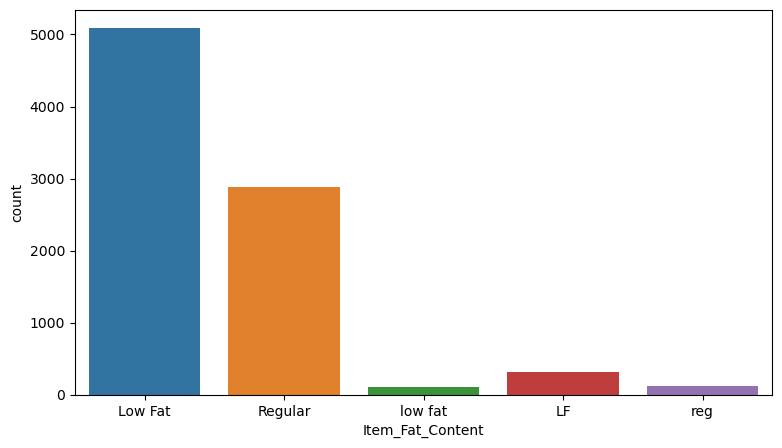

In [24]:
plt.figure(figsize=(9,5))
sns.countplot(data=data, x='Item_Fat_Content');


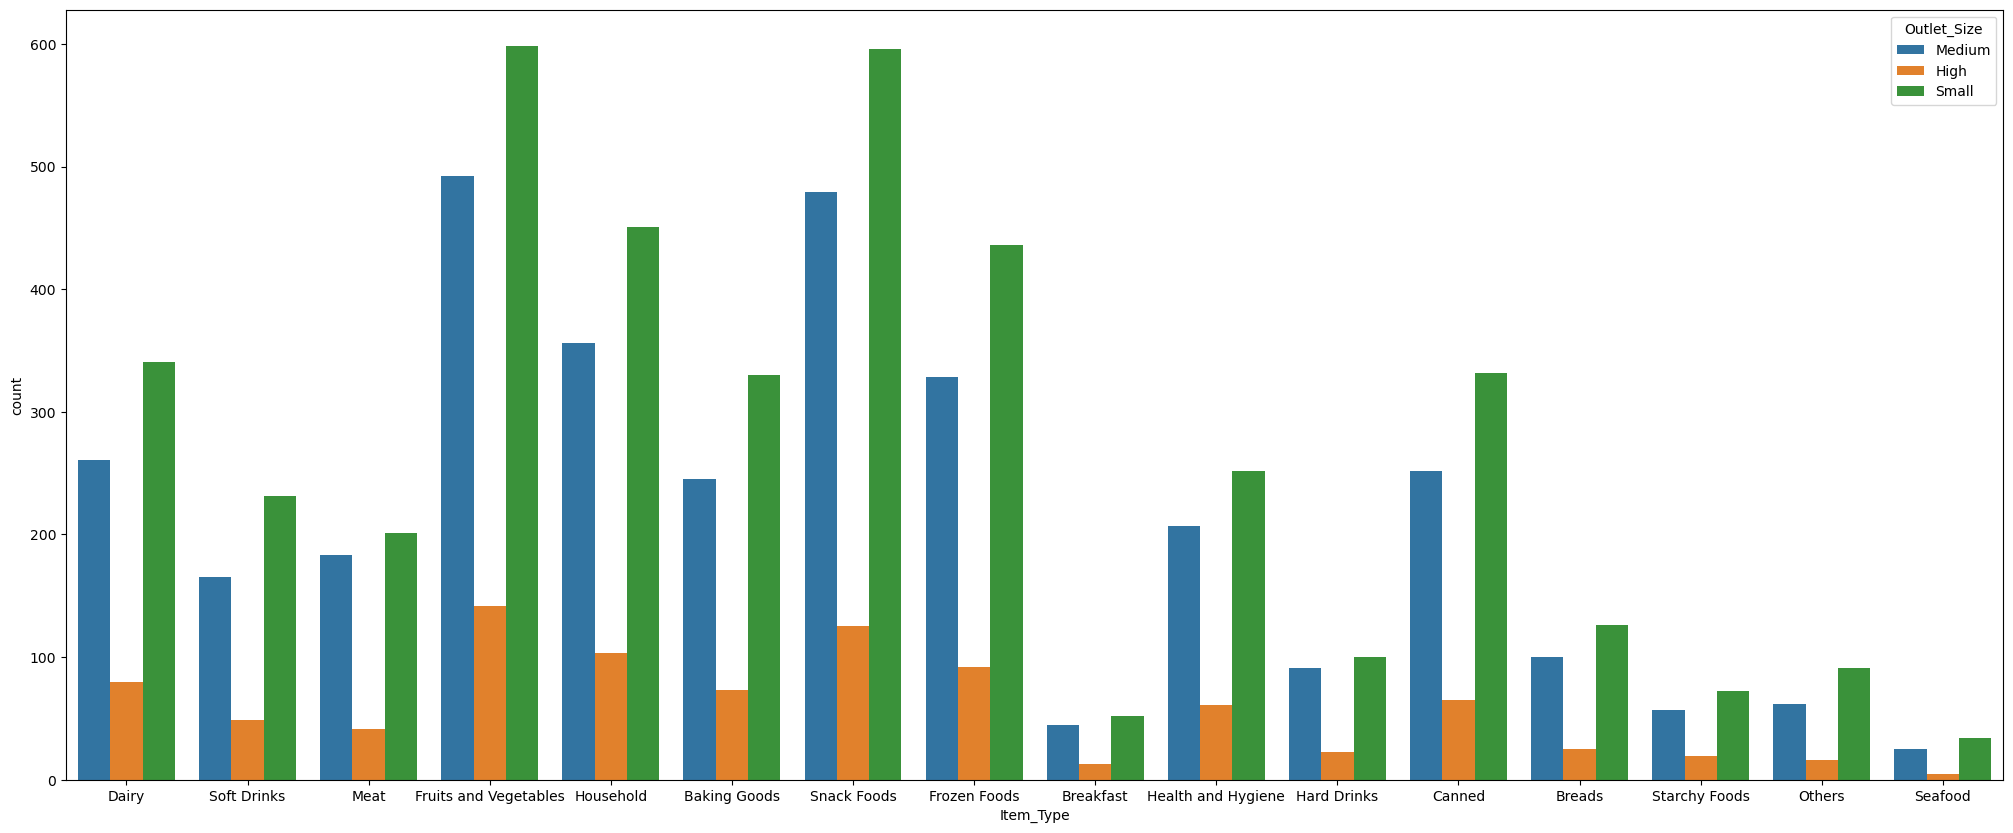

In [25]:
plt.figure(figsize=(25,10))
sns.countplot(data=data, x='Item_Type' , hue = 'Outlet_Size');
     

## Correlation between columns and Target

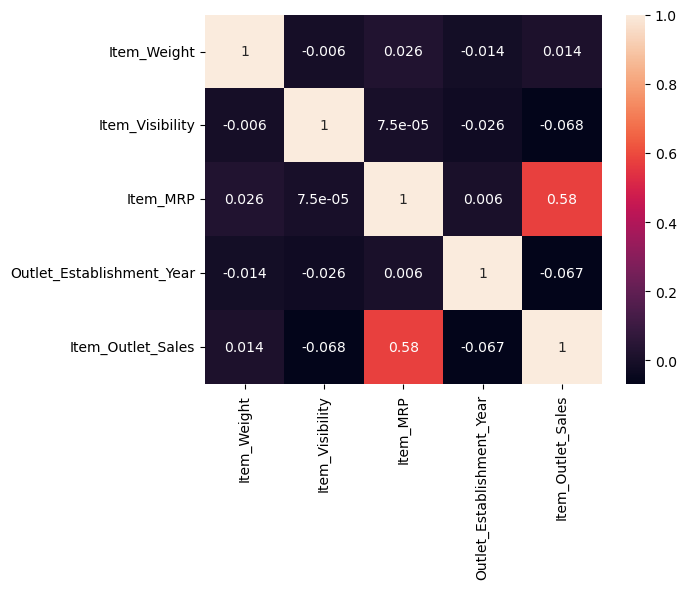

In [26]:
sns.heatmap(data_1.corr() , annot=True);

In [27]:
data_1.drop('Item_Identifier' , axis=1 , inplace=True)
data_1.drop('Outlet_Identifier' , axis=1 , inplace=True)

## Encoding 

#### Label Encoding 

In [28]:

lb = LabelEncoder()

col = ['Outlet_Size'  , 'Outlet_Location_Type'  
       ,'Item_Fat_Content' , 'Item_Type'  ]

for i in col:

    data_1[i] = lb.fit_transform(data_1[i] )

### One Hot Encoding 

In [29]:
data_1 = pd.get_dummies(data_1 , drop_first=True)

## Splitting Data

In [30]:
x = data_1.drop('Item_Outlet_Sales' , axis = 1)
y = data_1['Item_Outlet_Sales']

In [31]:

x_train , x_test , y_train , y_test = train_test_split(x,y,shuffle=True , random_state=42)

## Feature Scaling

In [32]:


scl = StandardScaler()

x_train = scl.fit_transform(x_train)
x_test = scl.transform(x_test)

# Building ML  Algorithms 

### Linear Regression 

In [33]:
test = []
train = []
model_1 = LinearRegression()

model_1.fit(x_train , y_train)

z = model_1.score(x_train , y_train)
train.append(z)
z 

0.5560658447531538

In [34]:
z = model_1.score(x_test,y_test)
test.append(z)
z

0.5595467205067961

### Regularized Linear Regression 

In [35]:

model_2 = Ridge()
model_3 = Lasso()


model_2.fit(x_train,y_train)

model_3.fit(x_train,y_train)

l2 = model_2.score(x_train,y_train)
l1 = model_3.score(x_train,y_train)
train.append(l2 )
train.append(l1 )

print('Ridge score is : ' , l2)
print('Lasso score is : ' , l1)

Ridge score is :  0.5560657427806855
Lasso score is :  0.5560557565201385


In [36]:
l2 = model_2.score(x_test,y_test)
l1 = model_3.score(x_test,y_test)
test.append(l2)
test.append(l1)
print('Ridge score is : ' , l2)
print('Lasso score is : ' , l1)

Ridge score is :  0.5595533947747209
Lasso score is :  0.559653421115397


## Random Forest 

first we should choose best hyperparameter to our Random Forest Model so we will use Grid Search To tune our HyperParameter 

In [37]:

model_4 = RandomForestRegressor()

### Grid Search

In [38]:
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [3, 6, 9],
}

grid_search = GridSearchCV(model_4,
                           param_grid=param_grid)
grid_search.fit(x_train, y_train)
print(grid_search.best_estimator_)

RandomForestRegressor(max_depth=6)


In [48]:
model_4_best = RandomForestRegressor(max_depth=6 , n_jobs=-1 , n_estimators = 150)

model_4_best.fit(x_train, y_train) 

z = model_4_best.score(x_train, y_train)
train.append(z)
z

0.6294613088070993

In [49]:
z = model_4_best.score(x_test, y_test)
test.append(z)
z

0.5927536620386235

## XG BOOST

In [41]:
model_5 = XGBRegressor(n_estimators = 120 , n_jobs = -1,max_depth=3 )
model_5.fit(x_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=120, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [42]:
z = model_5.score(x_train, y_train)
train.append(z)
z

0.6880605302088901

In [43]:
z = model_5.score(x_test, y_test)
test.append(z)
z

0.5609670931187161

In [44]:
history = {'Train' : train , "Test" : test}

compination = pd.DataFrame(history , index = ['LR' , 'Ridge' , 'Lasso'  , 'RF' , 'XG BOOST'])

## Summary 

In [45]:
compination

,Train,Test
LR,0.556066,0.559547
Ridge,0.556066,0.559553
Lasso,0.556056,0.559653
RF,0.629529,0.591568
XG BOOST,0.688061,0.560967
